In [1]:
import pandas as pd
import numpy as np

In [2]:
# define path for csv file
file_path_on_time = 'C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Winnipeg-Transit-System\\DataFiles\\Transit_On-Time_Performance_Route_past_year.csv'

In [3]:
# import csv file for on-time data for winnipeg transit 
on_time_df = pd.read_csv(file_path_on_time, delimiter=',')

In [8]:
on_time_df

,Route Number,Route Name,Route Destination,Day Type,Day,Time Period,Early Stops,Late Stops,On-Time Stops
0,10,St. Boniface-West Broadway,Downtown,Weekday,01/04/2023 12:00:00 AM,18:30-22:30,5,0,17
1,10,St. Boniface-West Broadway,Downtown,Weekday,01/05/2023 12:00:00 AM,18:30-22:30,1,0,21
2,10,St. Boniface-West Broadway,Downtown,Weekday,01/06/2023 12:00:00 AM,18:30-22:30,0,22,0
3,10,St. Boniface-West Broadway,Downtown,Weekday,01/09/2023 12:00:00 AM,18:30-22:30,0,21,1
4,10,St. Boniface-West Broadway,Downtown,Weekday,01/10/2023 12:00:00 AM,18:30-22:30,0,0,22
...,...,...,...,...,...,...,...,...,...
233665,BLUE,Route BLUE,University of Manitoba,Weekday,06/30/2023 12:00:00 AM,05:00-09:00,22,30,150
233666,BLUE,Route BLUE,University of Manitoba,Weekday,06/30/2023 12:00:00 AM,09:00-16:00,22,46,230
233667,BLUE,Route BLUE,University of Manitoba,Weekday,06/30/2023 12:00:00 AM,16:00-18:30,18,43,60
233668,BLUE,Route BLUE,University of Manitoba,Weekday,06/30/2023 12:00:00 AM,18:30-22:30,1,5,68


##### Starting with data cleaning.

In [7]:
# check data types 
on_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233670 entries, 0 to 233669
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Route Number       233670 non-null  object
 1   Route Name         233670 non-null  object
 2   Route Destination  233670 non-null  object
 3   Day Type           233670 non-null  object
 4   Day                233670 non-null  object
 5   Time Period        233670 non-null  object
 6   Early Stops        233670 non-null  int64 
 7   Late Stops         233670 non-null  int64 
 8   On-Time Stops      233670 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 16.0+ MB


In [9]:
# change datatype for Day to Datatime
on_time_df['Day'] = pd.to_datetime(on_time_df['Day'])

In [15]:
# change data type from object to integer
on_time_df['Early Stops'] = on_time_df['Early Stops'].astype(int)

In [16]:
on_time_df['Late Stops'] = on_time_df['Late Stops'].astype(int)

In [18]:
on_time_df['On-Time Stops'] = on_time_df['On-Time Stops'].astype(int)

In [19]:
# check updated datatypes 
on_time_df.dtypes

Route Number                 object
Route Name                   object
Route Destination            object
Day Type                     object
Day                  datetime64[ns]
Time Period                  object
Early Stops                   int32
Late Stops                    int32
On-Time Stops                 int32
dtype: object

In [20]:
on_time_df

,Route Number,Route Name,Route Destination,Day Type,Day,Time Period,Early Stops,Late Stops,On-Time Stops
0,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-04,18:30-22:30,5,0,17
1,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-05,18:30-22:30,1,0,21
2,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-06,18:30-22:30,0,22,0
3,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-09,18:30-22:30,0,21,1
4,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-10,18:30-22:30,0,0,22
...,...,...,...,...,...,...,...,...,...
233665,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,05:00-09:00,22,30,150
233666,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,09:00-16:00,22,46,230
233667,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,16:00-18:30,18,43,60
233668,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,18:30-22:30,1,5,68


In [21]:
# check for any null values
on_time_df.isnull().sum()

Route Number         0
Route Name           0
Route Destination    0
Day Type             0
Day                  0
Time Period          0
Early Stops          0
Late Stops           0
On-Time Stops        0
dtype: int64

In [23]:
# check for duplicating values
on_time_df.duplicated().sum()

0

In [26]:
# check unique routes
unique_route_count = on_time_df['Route Number'].nunique()
print(unique_route_count)

85


In [27]:
# Grouping the dataframe and showing each "Route Number" and "Route Name"
route_name_by_number = on_time_df.groupby('Route Number')['Route Name'].first().reset_index()

#showing result
print(route_name_by_number)

   Route Number                               Route Name
0            10               St. Boniface-West Broadway
1            11                         Portage-Kildonan
2            12                                  William
3            14                        Ellice-St. Mary's
4            15                         Sargent-Mountain
..          ...                                      ...
80           95                       Tuxedo - Riverview
81           96          St. Vital Centre - Windsor Park
82           97  Inkster Industrial Park - Point Douglas
83           98                Westdale - Grace Hospital
84         BLUE                               Route BLUE

[85 rows x 2 columns]


In [28]:
# describing numerical columns
on_time_df.describe()

,Early Stops,Late Stops,On-Time Stops
count,233670.000000,233670.000000,233670.000000
mean,40.953524,61.624428,146.909766
std,56.968016,93.583899,168.775998
min,0.000000,0.000000,0.000000
25%,2.000000,2.000000,34.000000
50%,20.000000,27.000000,96.000000
75%,56.000000,82.000000,197.000000
max,885.000000,1594.000000,1821.000000


Analyzing realtionship between Early Stops, On-Time Stops and Late Stops

In [39]:
#checking correlation matrix
print(on_time_df.corr())

               Early Stops  Late Stops  On-Time Stops
Early Stops       1.000000    0.254678       0.725021
Late Stops        0.254678    1.000000       0.425706
On-Time Stops     0.725021    0.425706       1.000000


C:\Users\pruth\AppData\Local\Temp\ipykernel_11984\2309117773.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(on_time_df.corr())


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

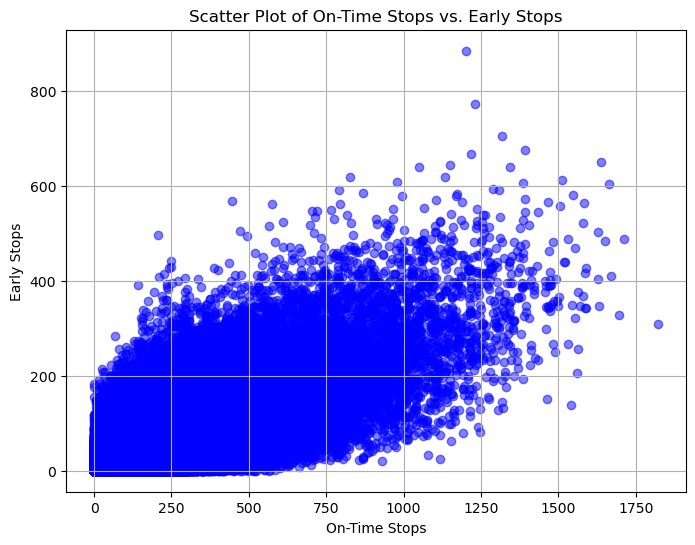

In [44]:
# As per correlation matrix there seems to be a strong correlation between Early stops and On-Time Stops
plt.figure(figsize=(8, 6))
plt.scatter(on_time_df['On-Time Stops'], on_time_df['Early Stops'], c='blue', alpha=0.5)
plt.title('Scatter Plot of On-Time Stops vs. Early Stops')
plt.xlabel('On-Time Stops')
plt.ylabel('Early Stops')
plt.grid(True)

# show the plot
plt.show()

##### As per Scatter plot it can be seen that as the number of On-Time stop increases the Early Stops also increases
##### : They are highly correlated

In [45]:
#sorting the data by Day(date) to see the range of dates for the data
df_sorted = on_time_df.sort_values(by='Day')

In [46]:
df_sorted

,Route Number,Route Name,Route Destination,Day Type,Day,Time Period,Early Stops,Late Stops,On-Time Stops
219797,650,McGillivray,Whyte Ridge via Kenaston Common,Sunday,2022-08-01,16:00-18:30,51,0,110
225959,BLUE,Route BLUE,Downtown,Sunday,2022-08-01,16:00-18:30,21,72,171
209254,12,William,Polo Park,Sunday,2022-08-01,09:00-16:00,46,76,128
225960,BLUE,Route BLUE,Downtown,Sunday,2022-08-01,18:30-22:30,27,136,144
224773,90,Kildonan Place - Whellams Lane,Henderson & Whellams,Sunday,2022-08-01,05:00-09:00,3,0,2
...,...,...,...,...,...,...,...,...,...
119788,83,Unicity - Strauss Dr - Murray Industrial Park,Unicity,Weekday,2023-07-31,09:00-16:00,13,82,173
119787,83,Unicity - Strauss Dr - Murray Industrial Park,Unicity,Weekday,2023-07-31,05:00-09:00,10,1,148
106073,17,McGregor,Amber Trails via,Weekday,2023-07-31,05:00-09:00,204,3,276
107248,19,Marion-Logan-Notre Dame,RRC Polytech via Notre Dame,Weekday,2023-07-31,16:00-18:30,43,164,94


#### Creating a stacked chart to see the percentage of times the bus was recorded as being early, on time, or late for each transit route

In [61]:
# calculate percentages for stops 
on_time_df['Early_Percentage'] = (on_time_df['Early Stops'] / (on_time_df['Early Stops'] + on_time_df['Late Stops'] + on_time_df['On-Time Stops'])) * 100

on_time_df['Late_Percentage'] = (on_time_df['Late Stops'] / (on_time_df['Early Stops'] + on_time_df['Late Stops'] + on_time_df['On-Time Stops'])) * 100

on_time_df['On_Time_Percentage'] = (on_time_df['On-Time Stops'] / (on_time_df['Early Stops'] + on_time_df['Late Stops'] + on_time_df['On-Time Stops'])) * 100

In [64]:
on_time_df

,Route Number,Route Name,Route Destination,Day Type,Day,Time Period,Early Stops,Late Stops,On-Time Stops,Early_Percentage,Late_Percentage,On_Time_Percentage
0,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-04,18:30-22:30,5,0,17,22.727273,0.000000,77.272727
1,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-05,18:30-22:30,1,0,21,4.545455,0.000000,95.454545
2,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-06,18:30-22:30,0,22,0,0.000000,100.000000,0.000000
3,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-09,18:30-22:30,0,21,1,0.000000,95.454545,4.545455
4,10,St. Boniface-West Broadway,Downtown,Weekday,2023-01-10,18:30-22:30,0,0,22,0.000000,0.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
233665,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,05:00-09:00,22,30,150,10.891089,14.851485,74.257426
233666,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,09:00-16:00,22,46,230,7.382550,15.436242,77.181208
233667,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,16:00-18:30,18,43,60,14.876033,35.537190,49.586777
233668,BLUE,Route BLUE,University of Manitoba,Weekday,2023-06-30,18:30-22:30,1,5,68,1.351351,6.756757,91.891892


In [65]:
# Create the Chart
plt.figure(figsize=(10, 6))

plt.bar(on_time_df['Route Number'], on_time_df['Early_Percentage'], label='Early', color='red')
plt.bar(on_time_df['Route Number'], on_time_df['On_Time_Percentage'], bottom = on_time_df['Early_Percentage'], label='On Time', color='green')
plt.bar(on_time_df['Route Number'], on_time_df['Late_Percentage'], bottom = on_time_df['Early_Percentage'] + on_time_df['On_Time_Percentage'], label='Late', color='yellow')

# Add Labels and Legend
plt.xlabel('Route')
plt.ylabel('Percentage')
plt.title('Bus Punctualtity by Route')
plt.legend()

#save the chart
#plt.savefig('C:\\Users\\pruth\\Desktop\\Data Science Lectures\\Winnipeg-Transit-System\\DataFiles\\Stacked.png')
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000002554EA184A0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000025551039620> (for post_execute):



KeyboardInterrupt

